**Анализ пользовательского взаимодействия с карточками статей в Яндекс.Дзен.** <br>
Задание: необходимо подготовить дашборд в Tableau Pulic и презентацию на основе данных поведения клиентов  и взаимодействия пользователей с карточками Яндекс.Дзен.

Финишная ссылка на дашборд Tableau Pulic:
https://public.tableau.com/app/profile/tachkov.serge/viz/10_YP_06_01_2022/YP_dashboard?publish=yes


**Описание проекта**<br/>
<b>Данные:</b><br/>
Необходимо использовать cырые данные о событиях взаимодействия пользователей с карточками (таблица log_raw на rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net). Или все-таки можно использовать только таблицу dash_visits?<br/><br/>
<b>Состав данных для дашборда:</b><br/>
История событий по темам карточек (два графика - абсолютные числа и процентное соотношение); <br/>
Разбивка событий по темам источников;<br/>
Таблица соответствия тем источников темам карточек.<br/><br/>
<b>Необходимая группировка данных:</b><br/>
Дата и время;
Тема карточки;
Тема источника;
Возрастная группа.<br/><br/>
<b>Макет дашборда:</b><br/>
Требуемый макет дашборда доступен по адресу https://pictures.s3.yandex.net/resources/Untitled_-_2020-07-06T161108.832_1594041107.png<br/><br/>
<b>Требуемые действия:</b><br/>
Необходимо опубликовать созданный по заданию дашборд на Tableau Pulic с доступностью для всего интернета; <br/>
Необходимо подготовить презентацию с отчетом в формате .pdf с ответами на следующие вопросы менеджеров с соответствующими графиками:<br/>
Сколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?<br/>
Как много карточек генерируют источники с разными темами?<br/>
Как соотносятся темы карточек и темы источников?


<a name="contents"></a><br/>
<a name="chapter_0"></a>    
**Содержание**<br/>
[**1. Изучение данных из полученного файла данных**](#chapter_1.)<br/>
[1.1. Выставление окружения и импорт библиотек.](#chapter_1.1.)<br/> 
[1.2. Получение начальных файлов данных с yandexcloud.net.](#chapter_1.2.)<br/>
[1.3. Описание данных, начальное.](#chapter_1.3.)<br/>
[1.4. Краткие выводы по структуре датасета dash_data (log_row) и dash_visits.](#chapter_1.4.)<br/>

[**2. Изучение данных конкретных столбцов и предобработка данных**](#chapter_2.)<br/>
[2.1. Изучение данных датасета dash_data (log_row)](#chapter_2.1.)<br/>
[2.1.1. Столбец event_id, датасет dash_data (log_row).](#chapter_2.1.1.)<br/>
[2.1.2. Столбец age_segment, датасет dash_data (log_row).](#chapter_2.1.2.)<br/>
[2.1.3. Столбец event, датасет dash_data (log_row).](#chapter_2.1.3.)<br/>
[2.1.4. Столбец item_id, датасет dash_data (log_row).](#chapter_2.1.4.)<br/>
[2.1.5. Столбец item_topic, датасет dash_data (log_row).](#chapter_2.1.5.)<br/>
[2.1.6. Столбец item_type, датасет dash_data (log_row).](#chapter_2.1.6.)<br/>
[2.1.7. Столбец source_id, датасет dash_data (log_row).](#chapter_2.1.7.)<br/>
[2.1.8. Столбец source_topic, датасет dash_data (log_row).](#chapter_2.1.8.)<br/>
[2.1.9. Столбец source_type, датасет dash_data (log_row).](#chapter_2.1.9.)<br/>
[2.1.10. Столбец ts, датасет dash_data (log_row).](#chapter_2.1.10.)<br/>
[2.1.11. Столбец user_id, датасет dash_data (log_row).](#chapter_2.1.11.)<br/>
[2.2. Изучение данных датасета dash_visits](#chapter_2.2.)<br/>
[2.2.1. Столбец record_id, датасет dash_visits.](#chapter_2.2.1.)<br/>
[2.2.2. Столбец age_segment, датасет dash_visits.](#chapter_2.2.2.)<br/>
[2.2.3. Столбец item_topic, датасет dash_visits.](#chapter_2.2.3.)<br/>
[2.2.4. Столбец source_topic, датасет dash_visits.](#chapter_2.2.4.)<br/>
[2.2.5. Столбец visits, датасет dash_visits.](#chapter_2.2.5.)<br/>
[2.2.6. Столбец dt, датасет dash_visits.](#chapter_2.2.6.)<br/>
[2.3. Проверка совпадения основных трендов обоих датасетов.](#chapter_2.3.)<br/>
[2.4. Краткие выводы по изучению таблиц.](#chapter_2.4.)<br/>
    
[**3. Подготовка данных для Tableau Pulic и презентации.**](#chapter_3.)    
[3.1. Подготовка данных для Tableau Pulic.](#chapter_3.1.)<br/>
[3.2. Подготовка данных для презентации.](#chapter_3.2.)<br/>


[**4. Выводы**](#chapter_4.) 


<a name="chapter_1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1. Изучение данных из полученного файла данных.</b> <br/>
</div>


<a name="chapter_1.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.1. Выставление окружения и импорт библиотек.</b> <br/>
</div>

1.1.1. Установим модуль psycopg2.

In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


1.1.2. Делаем импорт библиотек, используемых в курсе, и сделаем запрос на обновление основной библиотеки.

In [2]:
import pandas as pd
from sqlalchemy import create_engine # библиотека для коннекта со сторонним сервером

import matplotlib.pyplot as plt
import random

import datetime as dt

import numpy as np

import math as mt
from math import factorial

import scipy.stats
from scipy.stats import norm
from scipy import stats as st

import seaborn as sns                 # подождем пока, лучше позже, потому как при этом меняется вид обычных гистограмм
sns.set(color_codes=True)

import copy #импорт библиотеки по копированию Источник: https://pythononline.ru/osnovy/modul-copy-python

from plotly import graph_objects as go 

#import requests
#from urllib.parse import urlencode

#import requests  # Импорт библиотеки для запросов к серверу
#from bs4 import BeautifulSoup  # Импорт библиотеки для автоматического парсинга странички

#import re

#import warnings                       # предупреждения пока будем оставлять
#warnings.filterwarnings("ignore")



In [3]:
#!pip install pandas -U

#!conda list pandas
#!pip install pandas==1.2.4 # инсталлировал версию 1.2.4 С версией 1.3.3 - не совсем правильно рисовалась легенда графиков
!conda list pandas

# packages in environment at C:\Users\Tachkov\anaconda3:
#
# Name                    Version                   Build  Channel
pandas                    1.4.1                    pypi_0    pypi


1.1.3. Корректируем вывод табличных данных с помощью функции set_option() в Pandas

In [4]:
#pd.set_option('max_rows', 5) # поставим ограничение на вывод 5 строк https://habr.com/ru/post/521894/
pd.set_option('display.max_columns', None) # снимаем ограничение на отображение колонок
pd.set_option('display.float_format', '{:.2f}'.format) # ставим ограничение на количество выводимых знаков у float 
#pd.set_option('display.max_colwidth', 110) # снимаем ограничение на длину строк
#pd.set_option('display.max_colwidth', -1) # чтобы отобразились все символы в ячейках датафрейма


<a name="chapter_1.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.2. Получение начальных файлов данных с yandexcloud.net.</b> <br/>
</div>

Создаем коннект к базе, предварительно положили файл https://storage.yandexcloud.net/cloud-certs/CA.pem в папку с этим рабочим файлом .ipynb:

In [5]:
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

Делаем запрос на все поля, имеющиеся в базе log_row:

In [6]:
query = ''' SELECT *
            FROM log_raw
        '''

Коннекция к базе хранится в переменной engine. Делаем sql-запрос:

In [7]:
dash_data = pd.io.sql.read_sql(query, con = engine)
dash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322391 entries, 0 to 322390
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event_id      322391 non-null  int64 
 1   age_segment   322391 non-null  object
 2   event         322391 non-null  object
 3   item_id       322391 non-null  int64 
 4   item_topic    322391 non-null  object
 5   item_type     322391 non-null  object
 6   source_id     322391 non-null  int64 
 7   source_topic  322391 non-null  object
 8   source_type   322391 non-null  object
 9   ts            322391 non-null  int64 
 10  user_id       322391 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 27.1+ MB


Получилось, что уже радует ))

Отсмотрим последовательно этот датасет:

In [8]:
dash_data.head(5)

,event_id,age_segment,event,item_id,item_topic,item_type,source_id,source_topic,source_type,ts,user_id
0,2931262,18-25,show,1793260,Красота,native,8388799,История,publisher,1569349657638,2185026
1,2931277,18-25,show,7465641,Культура,native,5837959,История,publisher,1569349657971,6845238
2,2931285,18-25,show,406073,История,url,2335872,Сад и дача,domain,1569349658408,5244363
3,2931247,26-30,show,752665,Путешествия,native,6963489,Здоровье,publisher,1569349657189,7553074
4,2931278,26-30,click,6843081,Юмор,url,5427748,Семейные отношения,domain,1569349658054,1317585


In [9]:
missing_values = dash_data.isnull().sum()
display(missing_values)


event_id        0
age_segment     0
event           0
item_id         0
item_topic      0
item_type       0
source_id       0
source_topic    0
source_type     0
ts              0
user_id         0
dtype: int64

In [10]:
dash_data.columns

Index(['event_id', 'age_segment', 'event', 'item_id', 'item_topic',
       'item_type', 'source_id', 'source_topic', 'source_type', 'ts',
       'user_id'],
      dtype='object')

In [11]:
print('dash_data - дубликатов:', dash_data.duplicated().sum())

dash_data - дубликатов: 0


In [12]:
display(dash_data.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
event_id,322391.00,NaN,NaN,NaN,3664417.63,422730.08,2931239.00,3298014.50,3664890.00,4029580.50,4396846.00
age_segment,322391,6,18-25,136252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,322391,3,show,277969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_id,322391.00,NaN,NaN,NaN,4907859.82,2918019.15,116.00,2306626.00,4874690.00,7508017.00,9999779.00
item_topic,322391,25,Наука,22569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_type,322391,4,native,179966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_id,322391.00,NaN,NaN,NaN,4974883.31,2865431.66,3484.00,2613120.00,4862937.00,7573313.00,9999497.00
source_topic,322391,26,Семейные отношения,34614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_type,322391,2,publisher,198355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts,322391.00,NaN,NaN,NaN,1569351373984.72,325384.40,1569349656520.00,1569351353496.50,1569351433580.00,1569351513809.00,1569351659233.00


In [13]:
user_id_unic = dash_data['user_id'].nunique()
event_number = len(dash_data)
print('Среднее количество событий на пользователя (user_id): среднее - {}, мода - {}'.format(
    int(round(event_number/user_id_unic)), dash_data['user_id'].value_counts().mode()[0]))

Среднее количество событий на пользователя (user_id): среднее - 4, мода - 1


In [14]:
dash_data['user_id'].value_counts(dropna=False)

5620951    68
2276336    67
9652321    65
9438927    63
9600683    62
           ..
8266642     1
8139996     1
9458523     1
3011263     1
4916583     1
Name: user_id, Length: 88750, dtype: int64

Уникальных клиентов, вернее уникальных user_id - 88750 и лидеры пятерка лидеров с количеством записанных событий на уровне более 61, у лидера зафиксировано 68 событий.

Приступим к таблице dash_visits:

In [15]:
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

Делаем запрос на все поля, имеющиеся в таблице dash_visits:

In [16]:
query = ''' SELECT *
            FROM dash_visits
        '''

In [17]:
dash_visits = pd.io.sql.read_sql(query, con = engine)
dash_visits.info()
dash_visits.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


In [18]:
missing_values = dash_visits.isnull().sum()
display(missing_values)

record_id       0
item_topic      0
source_topic    0
age_segment     0
dt              0
visits          0
dtype: int64

In [19]:
display(dash_visits.describe(include='all').T)

<ipython-input-19-e9131f63e2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(dash_visits.describe(include='all').T)


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
record_id,30745.00,NaN,NaN,NaN,NaT,NaT,1055969.00,8875.46,1040597.00,1048283.00,1055969.00,1063655.00,1071341.00
item_topic,30745,25,Отношения,1536,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_topic,30745,26,Семейные отношения,1822,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_segment,30745,6,18-25,7056,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dt,30745,17,2019-09-24 18:58:00,3383,2019-09-24 18:28:00,2019-09-24 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visits,30745.00,NaN,NaN,NaN,NaT,NaT,10.09,19.73,1.00,1.00,3.00,10.00,371.00


Всего 17 уникальных значений в столбце dt - надо бы разобраться с этим.

 <a name="chapter_1.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.3. Описание данных, начальное.</b> <br/>
</div>

Файл dash_data (log_row) - данные поведения клиентов и их взаимодействия с карточками Яндекс.Дзен.<br/>
<br/>
<b>Структура dash_data:</b><br/>
Каждая запись в логе — это действие пользователя, или событие.<br/>
event_id — id события; <br/>
age_segment - возрастная категория клиента; <br/>
event - событие; <br/>
item_id - id карточки; <br/>
item_topic - тема карточки; <br/>
item_type - тип карточки; <br/>
source_id - id источника; <br/>
source_topic - тема источника; <br/>
source_type - тип источника; <br/>
ts - судя по всему это время события в формате unix time; <br/>
user_id - id клиента.   <br/><br/>

Файл dash_visits - тоже данные поведения клиентов и их взаимодействия с карточками Яндекс.Дзен, но уже в каком-то агрегированном виде, судя по всему.<br/>
<br/>
<b>Структура dash_visits:</b><br/>
Каждая запись в логе — это, похоже - агрегированные действия пользователя.<br/>
record_id — похоже на идентификатор обращений к определенной комбинации item_topic, source_topic и	age_segment; <br/>
age_segment - возрастная категория клиента; <br/>
item_topic - тема карточки; <br/>
source_id - id источника; <br/>
source_topic - тема источника; <br/>
dt - временная точка отсчета событий периодом в 1 минуту; <br/>
visits - количество обращений в момент и период dt к определенной комбинации item_topic, source_topic и	age_segment.   <br/><br/>

<a name="chapter_1.4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.4. Краткие выводы по структуре датасетов dash_data (log_row) и dash_visits.</b> <br/>
</div>

- в массиве <b>dash_data (log_row)</b> есть данные о 322391 действиях;
- пропусков и полных дубликатов нет;
- среднее количество событий на пользователя: среднее - 4, мода - 1;
- уникальных клиентов, вернее уникальных user_id - 88750 и лидеры пятерка лидеров с количеством записанных событий на уровне более 61, у лидера зафиксировано 68 событий;
- типы данных вполне нормальные object, int64. На такого размера таблице, видимо - уже есть смысл бороться за уменьшение объема памяти, посмотрим позже;
- всего видим три уникальных событий event  в датасете и наиболее частое событие - show с количеством 277969 раз;
- видим 6 возрастных категорий в age_segment и наиболее частая категория 18-25 с количеством 136252 раз;
- видим 25 тем карточек в item_topic и наиболее частая категория Наука 	с количеством 22569  раз;
- видим 4 типов тем карточек в item_type и наиболее частая native 	с количеством 179966  раз;
- видим 26 источников тем в source_topic и наиболее частая Семейные отношения с количеством	34614 раз;
- видим 2 типа источников в source_type и наиболее частый publisher с количеством 198355 раз;
- столбец ts в формате unix time. Судя по максимальной и миниальной величинам - это количество 0,001 секунд, прошедших с 00:00:00 1 января 1970 года. Время unix соответствует Всемирному координированному времени, или UTC. Так как проблемы экономии места у нас пока не просматривается, то, думаю - переведем данные  к формату datetime64. Но дополнительным столбцом. Потому как unix time может дать некоторое преимущество при манипуляциях с временными данными;
- все названия столбцов в строчном виде и вполне корректны;
- названия в item_topic и source_topic тоже бы к строчному виду, но вначале давайте увидим длину этих названий.  <br/><br/>
- в массиве <b>dash_visits</b> есть данные о 30745 записях;
- пропусков и полных дубликатов нет;
- типы данных вполне нормальные object, int64 и datetime64. На такого размера таблице нет смысла бороться за уменьшение объема памяти;
- видим 6 возрастных категорий в age_segment и наиболее частая категория 18-25 с количеством 7056 раз;
- видим 25 тем карточек в item_topic и наиболее частая категория Отношения 	с количеством 1536  раз;
- видим 26 источников тем в source_topic и наиболее частая Семейные отношения с количеством	1822 раз;
- столбец dt имеет всего 17 уникальных значений, first 2019-09-24 18:28:00 и last 2019-09-24 19:00:00, что дает временной период в 32 минуты. Но при всего 17 уникальных значениях явно отсутствуют данные за определенный период времени, что есть странновато;
- все названия столбцов в строчном виде и вполне корректны;
- названия в item_topic и source_topic тоже бы к строчному виду, но вначале давайте увидим длину этих названий.   

<a name="chapter_2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2. Изучение данных конкретных столбцов и предобработка данных.</b> <br/>
</div>

<a name="chapter_2.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1. Изучение данных датасета dash_data (log_row).</b> <br/>
</div>

<a name="chapter_2.1.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1.1. Столбец event_id, датасет dash_data (log_row).</b> <br/>
</div>

Посмотрим на частотность появления event_id и заодно их уникальность. Впрочем, это только для формы, функция describe уже дала выше ответ на эти вопросы.

In [20]:
dash_data['event_id'].value_counts(dropna=False)

2931262    1
3908144    1
3908137    1
3908172    1
3908165    1
          ..
3421168    1
3421158    1
3421163    1
3421156    1
4396838    1
Name: event_id, Length: 322391, dtype: int64

<a name="chapter_2.1.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1.1. Столбец age_segment, датасет dash_data (log_row).</b> <br/>
</div>

In [21]:
dash_data['age_segment'].value_counts(dropna=False)

18-25    136252
26-30     62734
31-35     55841
36-40     39518
41-45     16912
45+       11134
Name: age_segment, dtype: int64

Всего 6 возрастных категорий и интересно, что лидирует самая младшая категория с результатом 136252  событий. Надеюсь, что данные Дзен реальные.

<a name="chapter_2.1.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1.3. Столбец event, датасет dash_data (log_row).</b> <br/>
</div>

In [22]:
dash_data['event'].value_counts(dropna=False)

show     277969
click     23235
view      21187
Name: event, dtype: int64

In [23]:
ctr = 23235 / 277969
view_lost = (23235 - 21187) / 23235
print('Доля кликнувших по карточке: {:.1%}'.format(ctr))
print('Доля потерянных view: {:.1%}'.format(view_lost))

Доля кликнувших по карточке: 8.4%
Доля потерянных view: 8.8%


Видим, что у нас нет в датасете нештатных событий. Интересно, что доля тех, кто сделал клик и не дошел до статьи карточки равна 8,8%. <br/>
И довольной высокий CTR равный 8.4%.

<a name="chapter_2.1.4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1.4. Столбец item_id, датасет dash_data (log_row).</b> <br/>
</div>

In [24]:
dash_data['item_id'].value_counts(dropna=False)

2306626    4176
5733228    2077
787873     1217
886975     1177
9238291    1133
           ... 
5452861       1
5048207       1
4728930       1
5513838       1
8038125       1
Name: item_id, Length: 33396, dtype: int64

Видим, что есть 33396 уникальных карточек и первая пятерка item_id начинается от 1133 событий, а лидером является item_id=2306626 с результатом 4176 раз. <br/>
Посмотрим лидера?

In [25]:
dash_data_item_id = dash_data.query('item_id == 2306626')
display(dash_data_item_id.head(5))

,event_id,age_segment,event,item_id,item_topic,item_type,source_id,source_topic,source_type,ts,user_id
40,2931425,18-25,show,2306626,Рассказы,url,6381816,Путешествия,domain,1569349662862,5911570
66,2931476,41-45,show,2306626,Рассказы,url,6381816,Путешествия,domain,1569349664067,1740097
160,2931959,18-25,show,2306626,Рассказы,url,6381816,Путешествия,domain,1569349676120,8097423
195,2932083,45+,show,2306626,Рассказы,url,6381816,Путешествия,domain,1569349678222,6596743
200,2932159,26-30,show,2306626,Рассказы,url,6381816,Путешествия,domain,1569349679518,8375803


<a name="chapter_2.5.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1.5. Столбец item_topic, датасет dash_data (log_row).</b> <br/>
</div>

In [26]:
dash_data['item_topic'].value_counts(dropna=False)

Наука                 22569
Отношения             21468
Интересные факты      20724
Общество              20418
Подборки              18443
Россия                17677
Полезные советы       16057
История               15991
Семья                 12399
Женщины               11941
Дети                  11450
Рассказы              11330
Здоровье              10827
Деньги                10664
Культура              10619
Красота               10175
Туризм                 9880
Юмор                   9745
Путешествия            9664
Скандалы               9626
Искусство              8858
Психология             8353
Женская психология     8035
Шоу                    7783
Знаменитости           7695
Name: item_topic, dtype: int64

25 уникальных item_topic. Как-то пока у меня не сильно сочетается самая популярная тема Наука с результатом 22569 с лидирующей молодежной аудиторией 18-25

<a name="chapter_2.1.6."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1.6. Столбец item_type, датасет dash_data (log_row).</b> <br/>
</div>

In [27]:
dash_data['item_type'].value_counts(dropna=False)

native            179966
url               124036
narrative_card     18323
post                  66
Name: item_type, dtype: int64

А здесь пока и не совсем понятно, что это за типы?<br/>
native - обычная карточка со статьей;<br/>
url - это скорее всего обозначение материала с видео<br/>
narrative_card - это может быть карточка из набора карточек, объединенных общей тематикой, https://habr.com/ru/company/yandex/blog/349220/ <br/>
post - это короткий пост и судя по всему narrative_card и post с 3 апреля 2020 убрали из Дзена, https://zen.yandex.ru/media/zenmag/otkliuchenie-narrativov-i-postov-5e86f914862a504fb17b38af, не забудем проверить по датам временного диапазона нашего датасета немного позже.<br/><br/>
Насколько мы видим из цифр - решение об удалении двух форматов скорее всего принято на основе их довольно низкой популярности.

<a name="chapter_2.1.7."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1.7. Столбец source_id, датасет dash_data (log_row).</b> <br/>
</div>

In [28]:
dash_data['source_id'].value_counts(dropna=False)

6381816    4202
8482815    2509
2613120    2380
8287819    2206
4079059    2089
           ... 
402330        1
8530559       1
7037910       1
865228        1
3493197       1
Name: source_id, Length: 8059, dtype: int64

Интересно, что есть 8059 уникальных источников source_id и пятерка самых популярных от 2089 событий с лидером в 4202 событий.

<a name="chapter_2.1.8."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1.8. Столбец source_topic, датасет dash_data (log_row).</b> <br/>
</div>

In [29]:
dash_data['source_topic'].value_counts(dropna=False)

Семейные отношения    34614
Россия                31020
Полезные советы       28537
Путешествия           25074
Знаменитости          24893
Кино                  20884
Дети                  15847
История               15176
Семья                 14465
Здоровье              13356
Одежда                12324
Авто                   9954
Искусство              8351
Сад и дача             7756
Политика               7622
Еда                    7167
Сделай сам             6521
Ремонт                 5931
Психология             5929
Спорт                  5431
Деньги                 5354
Интерьеры              3759
Технологии             3622
Строительство          3111
Музыка                 2974
Финансы                2719
Name: source_topic, dtype: int64

26 уникальных source_topic. Интересно, что у нас много повторов в названиях source_topic и item_topic, например: <br/>
Россия<br/>
Полезные советы<br/>
Путешествия<br/>
Знаменитости<br/>
Дети<br/>
История<br/>
Почему?<br/><br/>

И лидируют здесь Семейные отношения с результатом 34614 действий.

<a name="chapter_2.1.9."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1.9. Столбец source_type, датасет dash_data (log_row).</b> <br/>
</div>

In [30]:
dash_data['source_type'].value_counts(dropna=False)

publisher    198355
domain       124036
Name: source_type, dtype: int64

Насколько я понимаю, что это разделение на работу с отдельного сайта или организация канала Дзен. И побеждает пока канал, там меньше финансовых издержек, как я понимаю.

<a name="chapter_2.1.10."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1.10. Столбец ts, датасет dash_data (log_row).</b> <br/>
</div>

In [31]:
dash_data['ts'].value_counts(dropna=False)

1569351503957    10
1569351531110     9
1569351474713     9
1569351493151     9
1569351407971     8
                 ..
1569351381050     1
1569351381058     1
1569351381060     1
1569351381052     1
1569351659036     1
Name: ts, Length: 214808, dtype: int64

Давайте сделаем дополнительный столбец event_time и переведем данные к формату datetime64. И учтем, что unix-time здесь  с точностью до 0,001 секунды.
И для появившейся необходимости проверки сделаем столбец event_time_1m с округлением до минуты.

In [32]:
dash_data['event_time'] = dash_data['ts'] / 1000
dash_data['event_time'] = pd.to_datetime(dash_data['event_time'], unit='s')
dash_data['event_time_1s'] = dash_data['ts'] / 1000
dash_data['event_time_1s'] = dash_data['event_time_1s'].astype('int') 
dash_data['event_time_1s'] = pd.to_datetime(dash_data['event_time_1s'], unit='s')
dash_data['event_time_1m'] = dash_data['event_time_1s'].round('min')
dash_data.info()
display(dash_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322391 entries, 0 to 322390
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_id       322391 non-null  int64         
 1   age_segment    322391 non-null  object        
 2   event          322391 non-null  object        
 3   item_id        322391 non-null  int64         
 4   item_topic     322391 non-null  object        
 5   item_type      322391 non-null  object        
 6   source_id      322391 non-null  int64         
 7   source_topic   322391 non-null  object        
 8   source_type    322391 non-null  object        
 9   ts             322391 non-null  int64         
 10  user_id        322391 non-null  int64         
 11  event_time     322391 non-null  datetime64[ns]
 12  event_time_1s  322391 non-null  datetime64[ns]
 13  event_time_1m  322391 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(5), object(6)
memory usa

,event_id,age_segment,event,item_id,item_topic,item_type,source_id,source_topic,source_type,ts,user_id,event_time,event_time_1s,event_time_1m
0,2931262,18-25,show,1793260,Красота,native,8388799,История,publisher,1569349657638,2185026,2019-09-24 18:27:37.638000128,2019-09-24 18:27:37,2019-09-24 18:28:00
1,2931277,18-25,show,7465641,Культура,native,5837959,История,publisher,1569349657971,6845238,2019-09-24 18:27:37.971000064,2019-09-24 18:27:37,2019-09-24 18:28:00
2,2931285,18-25,show,406073,История,url,2335872,Сад и дача,domain,1569349658408,5244363,2019-09-24 18:27:38.408000000,2019-09-24 18:27:38,2019-09-24 18:28:00
3,2931247,26-30,show,752665,Путешествия,native,6963489,Здоровье,publisher,1569349657189,7553074,2019-09-24 18:27:37.188999936,2019-09-24 18:27:37,2019-09-24 18:28:00
4,2931278,26-30,click,6843081,Юмор,url,5427748,Семейные отношения,domain,1569349658054,1317585,2019-09-24 18:27:38.053999872,2019-09-24 18:27:38,2019-09-24 18:28:00


In [33]:
dash_data[['event_time']].describe()

<ipython-input-33-6a62cfb8fcd1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dash_data[['event_time']].describe()


,event_time
count,322391
unique,214808
top,2019-09-24 18:58:23.956999936
freq,10
first,2019-09-24 18:27:36.520000
last,2019-09-24 19:00:59.232999936


Не такой большой промежуток времени у нас во временном периоде датасета dash_data, всего примерно 33,5 минуты: <br/>
first - 2019-09-24 18:27:36.520000<br/>
last - 2019-09-24 19:00:59.232999936<br/>

И не совсем понятна тогда фраза в тех.задании, если и реального времени нет, да и данных всего на  33,5 минуты - "Частота обновления данных: один раз в сутки, в полночь по UTC?

In [34]:
dash_data[['event_time_1s']].describe()

<ipython-input-34-dbee6030057a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dash_data[['event_time_1s']].describe()


,event_time_1s
count,322391
unique,1003
top,2019-09-24 18:57:05
freq,1119
first,2019-09-24 18:27:36
last,2019-09-24 19:00:59


<a name="chapter_2.1.11."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1.11. Столбец user_id, датасет dash_data (log_row).</b> <br/>
</div>

In [35]:
dash_data['user_id'].value_counts(dropna=False)

5620951    68
2276336    67
9652321    65
9438927    63
9600683    62
           ..
8266642     1
8139996     1
9458523     1
3011263     1
4916583     1
Name: user_id, Length: 88750, dtype: int64

Не такая уже и малая активность некоторых пользователей, за полчаса успели сделать более 60 действий. <br/>
И у нас 88750 уникальных user_id.

<a name="chapter_2.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.2. Изучение данных датасета dash_visits.</b> <br/>
</div>

<a name="chapter_2.2.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.2.1. Столбец record_id, датасет dash_visits.</b> <br/>
</div>

In [36]:
dash_visits['record_id'].value_counts(dropna=False)

1040597    1
1060774    1
1061102    1
1061101    1
1061100    1
          ..
1050841    1
1050840    1
1050839    1
1050838    1
1071341    1
Name: record_id, Length: 30745, dtype: int64

Повторяемых record_id нет.

<a name="chapter_2.2.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.2.2. Столбец age_segment, датасет dash_visits.</b> <br/>
</div>

In [37]:
dash_visits['age_segment'].value_counts(dropna=False)

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

Возрастная категория 18-25 и здесь является лидером с результатом - 7056 записей.


<a name="chapter_2.2.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.2.3. Столбец item_topic, датасет dash_visits.</b> <br/>
</div>

In [38]:
dash_visits['item_topic'].value_counts(dropna=False)

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

Лидерство Наука ушло, лидируют Отношения  с результатом 1536

<a name="chapter_2.2.4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.2.4. Столбец source_topic, датасет dash_visits.</b> <br/>
</div>

In [39]:
dash_visits['source_topic'].value_counts(dropna=False)

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

А здесь также лидируют Семейные отношения    с результатом 1822

<a name="chapter_2.2.5."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.2.5. Столбец visits, датасет dash_visits.</b> <br/>
</div>

In [40]:
dash_visits['visits'].value_counts(dropna=False)

1      8999
2      4304
3      2637
4      1879
5      1359
       ... 
331       1
291       1
324       1
190       1
146       1
Name: visits, Length: 212, dtype: int64

<a name="chapter_2.2.6."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.2.6. Столбец dt, датасет dash_visits.</b> <br/>
</div>

In [41]:
dash_visits['dt'].value_counts(dropna=False)

2019-09-24 18:58:00    3383
2019-09-24 18:57:00    3342
2019-09-24 18:56:00    3325
2019-09-24 18:59:00    3317
2019-09-24 18:55:00    3088
2019-09-24 19:00:00    2729
2019-09-24 18:54:00    2551
2019-09-24 18:30:00    1261
2019-09-24 18:32:00    1257
2019-09-24 18:31:00    1253
2019-09-24 18:53:00    1107
2019-09-24 18:29:00    1031
2019-09-24 18:33:00    1007
2019-09-24 18:52:00     719
2019-09-24 18:28:00     615
2019-09-24 18:34:00     576
2019-09-24 18:35:00     184
Name: dt, dtype: int64

Посмотрим на гистограмме, где отсутствуют данные:

In [42]:
dash_visits_null = dash_visits.groupby('dt').agg(
    visits_count=('visits','count')) 

dash_visits_null = dash_visits_null.sort_values('dt', ascending = True)
display(dash_visits_null)
#dash_visits_null.info()

,visits_count
dt,
2019-09-24 18:28:00,615
2019-09-24 18:29:00,1031
2019-09-24 18:30:00,1261
2019-09-24 18:31:00,1253
2019-09-24 18:32:00,1257
2019-09-24 18:33:00,1007
2019-09-24 18:34:00,576
2019-09-24 18:35:00,184
2019-09-24 18:52:00,719


И посмотрим, как это выглядит на графике:

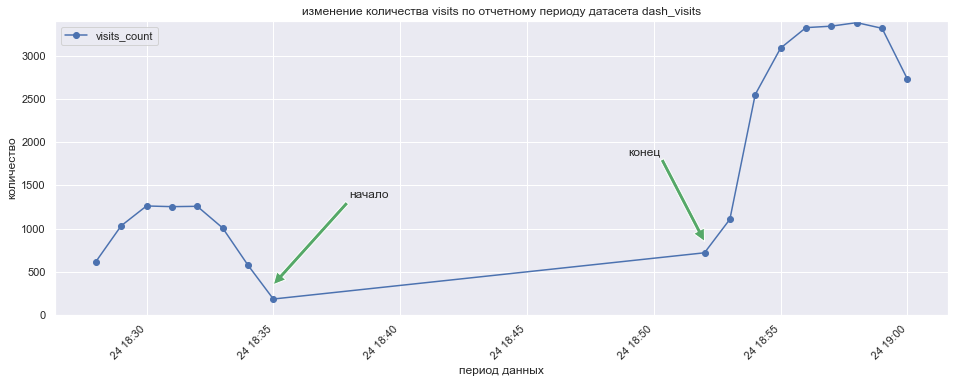

In [43]:
fig, ax = plt.subplots()
dash_visits_null.plot(y='visits_count', style='o-', ylim=(0, 3400), grid=True, figsize=(16, 6), ax=ax)
plt.annotate('начало', xy=('2019-09-24 18:35:00', 350), xytext=('2019-09-24 18:38:00', 1350),
           arrowprops=dict(facecolor='g'))
plt.annotate('конец', xy=('2019-09-24 18:52:00', 850), xytext=('2019-09-24 18:49:00', 1850),
            arrowprops=dict(facecolor='g'))
plt.xlabel('период данных')
plt.ylabel('количество')
plt.title('изменение количества visits по отчетному периоду датасета dash_visits')
plt.xticks(rotation = 45)
plt.show()

Не совсем мне понятно, откуда появился период с полностью отсутствующими данными. Мы, конечно, можем проверить, сделав такую же таблицу из более полной dash_data.
Сделаем аналогичный график на датасете dash_data (log_row)

<a name="chapter_2.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.3. Проверка совпадения основных трендов обоих датасетов.</b> <br/>
</div>

In [44]:
dash_data.info()
display(dash_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322391 entries, 0 to 322390
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_id       322391 non-null  int64         
 1   age_segment    322391 non-null  object        
 2   event          322391 non-null  object        
 3   item_id        322391 non-null  int64         
 4   item_topic     322391 non-null  object        
 5   item_type      322391 non-null  object        
 6   source_id      322391 non-null  int64         
 7   source_topic   322391 non-null  object        
 8   source_type    322391 non-null  object        
 9   ts             322391 non-null  int64         
 10  user_id        322391 non-null  int64         
 11  event_time     322391 non-null  datetime64[ns]
 12  event_time_1s  322391 non-null  datetime64[ns]
 13  event_time_1m  322391 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(5), object(6)
memory usa

,event_id,age_segment,event,item_id,item_topic,item_type,source_id,source_topic,source_type,ts,user_id,event_time,event_time_1s,event_time_1m
0,2931262,18-25,show,1793260,Красота,native,8388799,История,publisher,1569349657638,2185026,2019-09-24 18:27:37.638000128,2019-09-24 18:27:37,2019-09-24 18:28:00
1,2931277,18-25,show,7465641,Культура,native,5837959,История,publisher,1569349657971,6845238,2019-09-24 18:27:37.971000064,2019-09-24 18:27:37,2019-09-24 18:28:00
2,2931285,18-25,show,406073,История,url,2335872,Сад и дача,domain,1569349658408,5244363,2019-09-24 18:27:38.408000000,2019-09-24 18:27:38,2019-09-24 18:28:00
3,2931247,26-30,show,752665,Путешествия,native,6963489,Здоровье,publisher,1569349657189,7553074,2019-09-24 18:27:37.188999936,2019-09-24 18:27:37,2019-09-24 18:28:00
4,2931278,26-30,click,6843081,Юмор,url,5427748,Семейные отношения,domain,1569349658054,1317585,2019-09-24 18:27:38.053999872,2019-09-24 18:27:38,2019-09-24 18:28:00


In [45]:
dash_data_null = dash_data.groupby('event_time_1m').agg(
    event_id_count=('event_id','count')) 

dash_data_null = dash_data_null.sort_values('event_time_1m', ascending = True)
display(dash_data_null)
dash_data_null.info()

,event_id_count
event_time_1m,
2019-09-24 18:28:00,835
2019-09-24 18:29:00,1817
2019-09-24 18:30:00,2442
2019-09-24 18:31:00,2592
2019-09-24 18:32:00,2587
2019-09-24 18:33:00,1726
2019-09-24 18:34:00,763
2019-09-24 18:35:00,196
2019-09-24 18:52:00,1112


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2019-09-24 18:28:00 to 2019-09-24 19:01:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   event_id_count  18 non-null     int64
dtypes: int64(1)
memory usage: 288.0 bytes


Ну и посмотрим на графике:

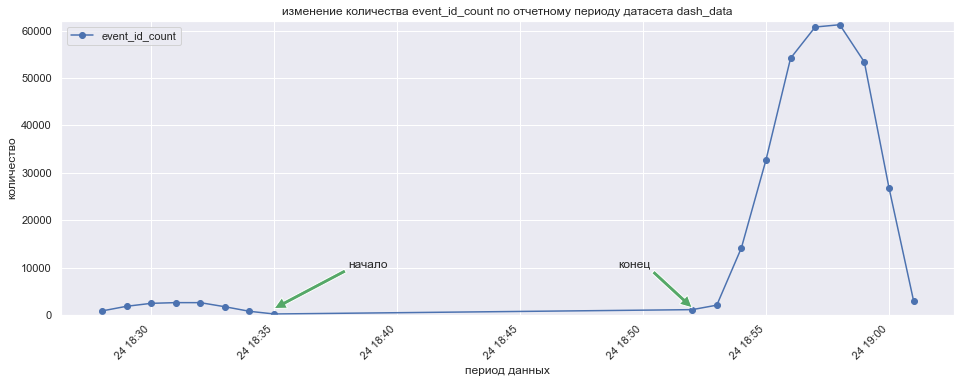

In [46]:
fig, ax = plt.subplots()
dash_data_null.plot(y='event_id_count', style='o-', ylim=(0, 62000), grid=True, figsize=(16, 6), ax=ax)
plt.annotate('начало', xy=('2019-09-24 18:35:00', 1350), xytext=('2019-09-24 18:38:00', 10000),
           arrowprops=dict(facecolor='g'))
plt.annotate('конец', xy=('2019-09-24 18:52:00', 1500), xytext=('2019-09-24 18:49:00', 10000),
            arrowprops=dict(facecolor='g'))
plt.xlabel('период данных')
plt.ylabel('количество')
plt.title('изменение количества event_id_count по отчетному периоду датасета dash_data')
plt.xticks(rotation = 45)
plt.show()

Проверка показала, что основные тренды графиков в обоих датасетах сходятся, пропущенный период данных полностью совпадает. <br/>
В dash_visits убрана последняя минута и, видимо, убраны какие-то еще данные и довольно много. Например, убраны некоторые source_type.<br/><br/>
Ну и пропуск данных похож на общую техническую недоступность сервиса или технические проблемы с его логгированием в этот период времени.


<a name="chapter_2.4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.4. Краткие выводы по изучению таблиц.</b> <br/>
</div>

Учитывая, что мы не знаем достоверность и правильность выборов (нет этого в описании задания) - вполне для дашборда можно взять и данные dash_visits. <br/>
Единственное, пока не совсем понимаю, как справиться с пропуском данных, чтобы он отображался на дашборде более корректно. Хотя, если ничего не делать, то будет также, как и на вышележащих графиках в виде соединения двух ближних точек. <br/>

<a name="chapter_3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3. Подготовка данных для Tableau Pulic и презентации.</b> <br/>
</div>

<a name="chapter_3.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.1. Подготовка данных для Tableau Pulic.</b> <br/>
</div>

Экспортируем файл для основных графиков дашборда.

In [47]:
#dash_visits.to_csv('C:/1_Webartel/2021/pithon_work/datasets/dash_visits.csv') #закомментируем пока вывод

Финишная ссылка на дашборд Tableau Pulic: <br/>
https://public.tableau.com/app/profile/tachkov.serge/viz/10_YP_06_01_2022/YP_dashboard?publish=yes


<a name="chapter_3.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.2. Подготовка данных для презентации.</b> <br/>
</div>

Диаграмма распределения количества визитов по темам карточек.

In [48]:
dash_visits.info()
display(dash_visits.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


In [49]:
dash_visits_item_sum = dash_visits.groupby('item_topic').agg(item_sum=(
    'visits','sum')).reset_index()
dash_visits_item_sum = dash_visits_item_sum.sort_values('item_sum', ascending = False)

display(dash_visits_item_sum)

,item_topic,item_sum
11,Наука,21736
13,Отношения,20666
6,Интересные факты,19942
12,Общество,19640
14,Подборки,17772
19,Россия,16966
15,Полезные советы,15435
8,История,15389
20,Семья,11897
3,Женщины,11499


In [50]:
def take_pic_4(data, legend_labels, title, y, x, ylabel='доля'):
    fig, ax = plt.subplots(1, 2, figsize=(18, 10))

    silent_labels = [' '] * len(data.values)
    
    
    cmap = sns.color_palette('Blues_r', len(data.values))
    
    data.plot.pie(shadow=True, autopct='%1.1f%%', \
                  labels=silent_labels, ax=ax[0], colors=cmap, subplots=True)
    ax[0].legend(loc=2, labels=legend_labels)
    ax[0].set_title(title, fontsize=12)
    ax[0].set_ylabel(ylabel)
    
    sns.barplot(y=y, x=x, data=data, estimator=sum, orient='h', ax=ax[1], palette=cmap)
    ax[1].set_ylabel(' ')
    ax[1].set_xlabel(' ')
    for i, val in enumerate(data.values):
        color = '#3E5F8A'
        ax[1].text(val +0.005, i +0.09, float("%0.2f"%val), color=color, fontdict={'fontweight':900, 'size':10})
    
    plt.show()

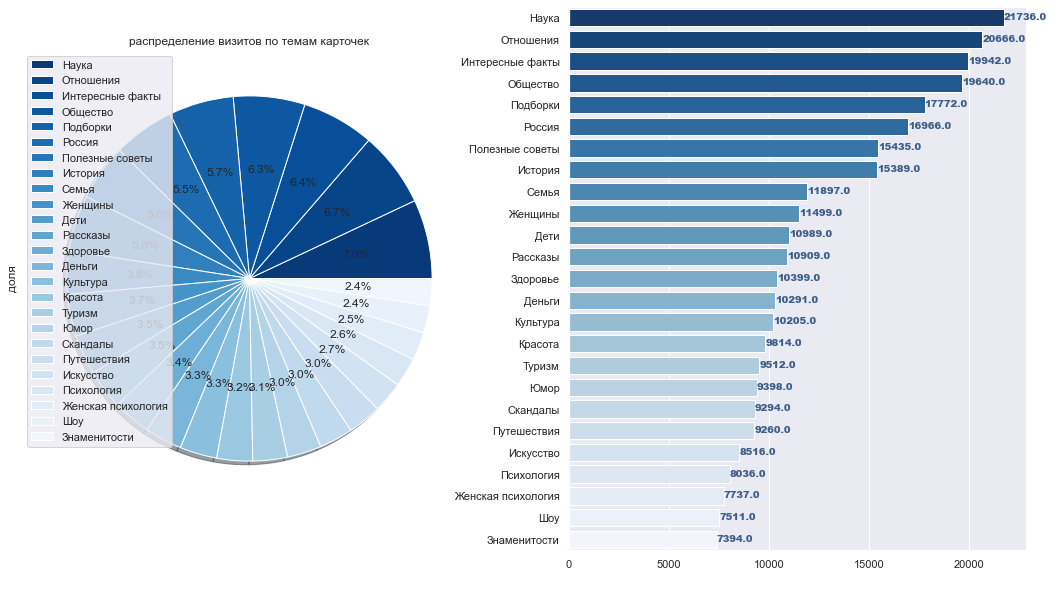

In [51]:
dash_visits_item_sum_graph = (dash_visits_item_sum
                 .pivot_table(index='item_topic', values='item_sum')
                 .sort_values('item_sum', ascending=False))

take_pic_4(data=dash_visits_item_sum_graph, legend_labels=dash_visits_item_sum_graph.index, \
         title='распределение визитов по темам карточек', y=dash_visits_item_sum_graph.index, x='item_sum')

По темам карточек по общему количеству визитов за весь отчетный период лидирует Наука с результатом 21736 визитов и 7,0%

Диаграмма распределения количества визитов по темам источников.

In [52]:
dash_visits_source_sum = dash_visits.groupby('source_topic').agg(source_sum=(
    'visits','sum')).reset_index()
dash_visits_source_sum = dash_visits_source_sum.sort_values('source_sum', ascending = False)

display(dash_visits_source_sum)

,source_topic,source_sum
20,Семейные отношения,33309
17,Россия,29831
12,Полезные советы,27412
15,Путешествия,24124
5,Знаменитости,23945
9,Кино,20084
2,Дети,15243
8,История,14628
21,Семья,13896
4,Здоровье,12831


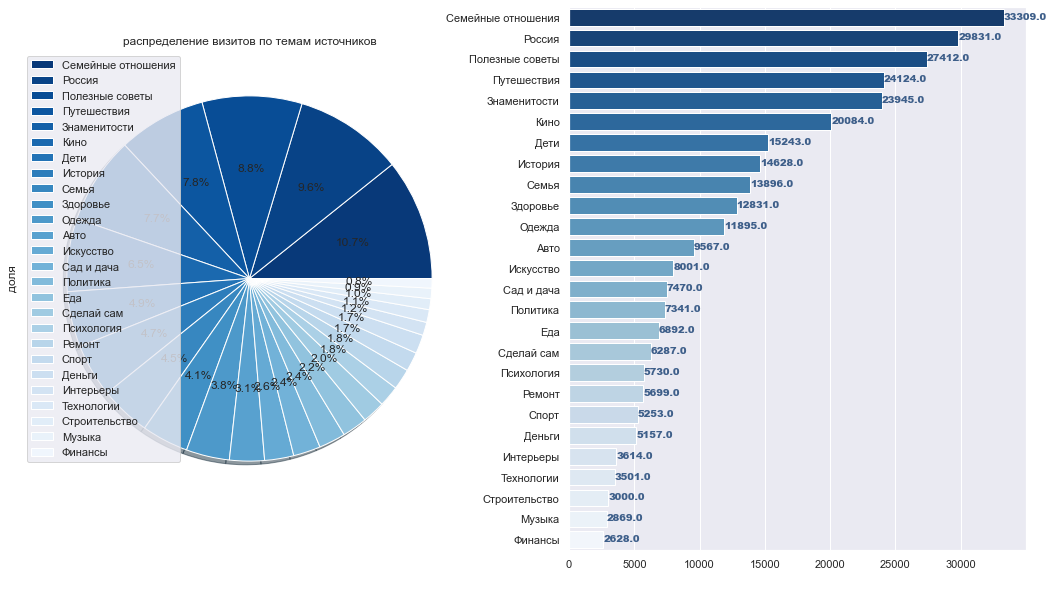

In [53]:
dash_visits_source_sum_graph = (dash_visits_source_sum
                 .pivot_table(index='source_topic', values='source_sum')
                 .sort_values('source_sum', ascending=False))

take_pic_4(data=dash_visits_source_sum_graph, legend_labels=dash_visits_source_sum_graph.index, \
         title='распределение визитов по темам источников', y=dash_visits_source_sum_graph.index, x='source_sum')

По темам источников по общему количеству визитов за весь отчетный период лидирует Семейные отношения с результатом 33309 визитов и 10,7%

Соотношение тем карточек и тем источников.

In [54]:
dash_visits_item_source_sum = dash_visits.groupby(['item_topic','source_topic']).agg(
    all_sum=('visits','sum')).reset_index()
dash_visits_item_source_sum = dash_visits_item_source_sum.sort_values('all_sum', ascending = False)

display(dash_visits_item_source_sum.head(10))

,item_topic,source_topic,all_sum
481,Рассказы,Путешествия,4587
327,Общество,Россия,3471
293,Наука,Кино,3279
509,Россия,Россия,2847
374,Подборки,Полезные советы,2795
330,Общество,Семейные отношения,2727
348,Отношения,Полезные советы,2716
221,История,Путешествия,2643
171,Интересные факты,Россия,2567
114,Здоровье,Полезные советы,2335


Такое распределение кажется достоверным, лидируют рассказы о путешествиях с результатом 4587. Интересно, как это будет выглядеть в разные времена года?<br/>
И очень интересно сочетание Наука и Кино - научно-популярные фильмы и видеофрагменты?

И не совсем знаю, как из этой таблицы построить heatmap?

In [55]:
dash_visits_item_source_sum_heat = dash_visits_item_source_sum.pivot_table(
    index='item_topic',
    columns='source_topic',
    values='all_sum')
#display(dash_visits_item_source_sum_heat.columns)
dash_visits_item_source_sum_heat[['Авто', 'Деньги', 'Дети', 'Еда', 'Здоровье', 'Знаменитости',
       'Интерьеры', 'Искусство', 'История', 'Кино', 'Музыка', 'Одежда',
       'Полезные советы', 'Политика', 'Психология', 'Путешествия', 'Ремонт',
       'Россия', 'Сад и дача', 'Сделай сам', 'Семейные отношения', 'Семья',
       'Спорт', 'Строительство', 'Технологии', 'Финансы']] = dash_visits_item_source_sum_heat[['Авто', 'Деньги', 'Дети', 'Еда', 'Здоровье', 'Знаменитости',
       'Интерьеры', 'Искусство', 'История', 'Кино', 'Музыка', 'Одежда',
       'Полезные советы', 'Политика', 'Психология', 'Путешествия', 'Ремонт',
       'Россия', 'Сад и дача', 'Сделай сам', 'Семейные отношения', 'Семья',
       'Спорт', 'Строительство', 'Технологии', 'Финансы']].fillna(0)
dash_visits_item_source_sum_heat[['Авто', 'Деньги', 'Дети', 'Еда', 'Здоровье', 'Знаменитости',
       'Интерьеры', 'Искусство', 'История', 'Кино', 'Музыка', 'Одежда',
       'Полезные советы', 'Политика', 'Психология', 'Путешествия', 'Ремонт',
       'Россия', 'Сад и дача', 'Сделай сам', 'Семейные отношения', 'Семья',
       'Спорт', 'Строительство', 'Технологии', 'Финансы']] = dash_visits_item_source_sum_heat[['Авто', 'Деньги', 'Дети', 'Еда', 'Здоровье', 'Знаменитости',
       'Интерьеры', 'Искусство', 'История', 'Кино', 'Музыка', 'Одежда',
       'Полезные советы', 'Политика', 'Психология', 'Путешествия', 'Ремонт',
       'Россия', 'Сад и дача', 'Сделай сам', 'Семейные отношения', 'Семья',
       'Спорт', 'Строительство', 'Технологии', 'Финансы']].astype(int)
display(dash_visits_item_source_sum_heat)
#dash_visits_item_source_sum_heat.info()

source_topic,Авто,Деньги,Дети,Еда,Здоровье,Знаменитости,Интерьеры,Искусство,История,Кино,Музыка,Одежда,Полезные советы,Политика,Психология,Путешествия,Ремонт,Россия,Сад и дача,Сделай сам,Семейные отношения,Семья,Спорт,Строительство,Технологии,Финансы
item_topic,,,,,,,,,,,,,,,,,,,,,,,,,,
Деньги,338,203,859,193,65,591,62,172,271,1042,42,98,1087,949,305,536,362,1132,101,137,696,345,134,68,88,415
Дети,192,228,621,675,346,1444,97,238,455,474,9,320,1541,135,128,431,174,547,633,354,1184,558,21,103,28,53
Женская психология,26,256,613,67,349,546,0,96,181,264,5,466,418,23,463,321,13,660,49,19,2073,759,26,0,39,5
Женщины,156,122,875,348,1022,967,175,485,560,340,45,547,986,78,253,192,67,397,125,223,2270,988,210,56,6,6
Здоровье,232,95,798,558,404,962,57,64,68,156,20,518,2335,121,214,393,145,712,542,548,814,247,197,106,74,19
Знаменитости,29,55,145,36,139,445,12,356,644,408,55,467,178,35,88,299,3,2275,21,6,764,234,433,50,158,59
Интересные факты,1254,145,327,391,2090,720,54,697,1273,1033,325,837,2023,340,449,1448,175,2567,825,341,1323,611,186,234,219,55
Искусство,145,98,639,7,70,1083,164,512,596,1254,223,209,331,121,98,664,172,632,43,128,754,404,54,53,58,4
История,522,114,1047,60,771,921,30,695,636,1091,164,310,859,695,227,2643,168,1491,209,149,1344,696,190,9,286,62


Пришлось дополнительно заменить отсутствующие значения на нулевые и привести к формату int.<br/>
И далее строим тепловую карту

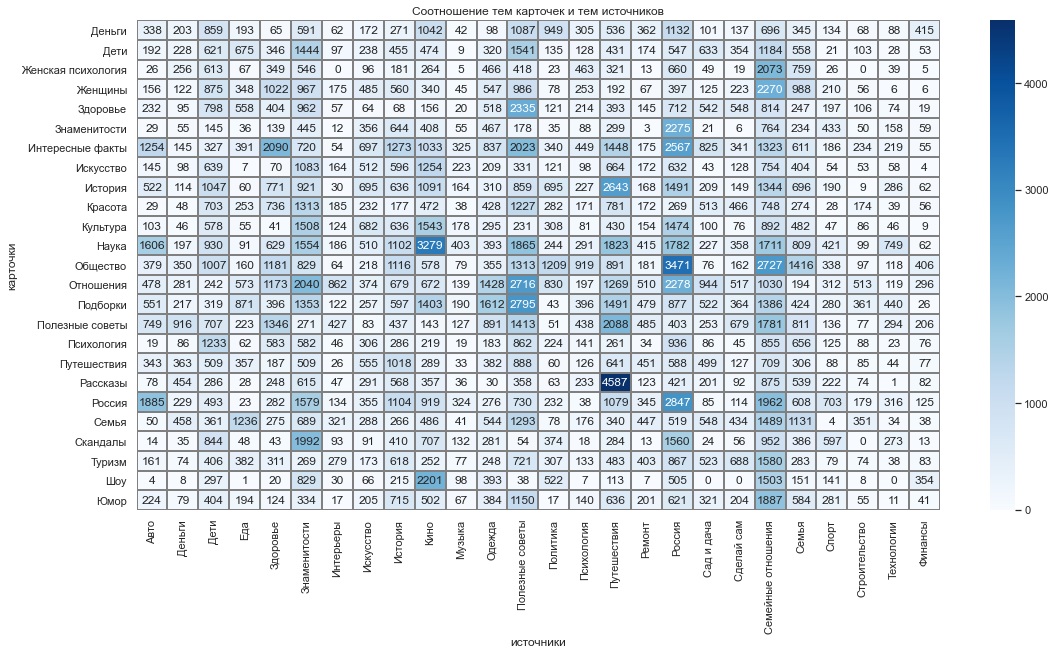

In [56]:
plt.figure(figsize=(18, 9))
plt.title('Соотношение тем карточек и тем источников')
sns.heatmap(dash_visits_item_source_sum_heat, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap= 'Blues') 
plt.xlabel('источники')
plt.ylabel('карточки')
plt.show()

Ну и тепловую карту построили.

Из задания:<br/>
- [x]  Сколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?<br/>
- [x]  Как много карточек генерируют источники с разными темами?<br/>
- [x]  Как соотносятся темы карточек и темы источников?<br/>

<a name="chapter_4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>4. Выводы.</b> <br/>
</div>

**4.1. Изучение данных из представленного файла данных**<br/>
<b>4.2. Краткие выводы по структуре датасета dash_data (log_row).</b><br/>
4.2.1. В массиве <b>dash_data (log_row)</b> есть данные о 322391 действиях;<br/>
пропусков и полных дубликатов нет;<br/>
среднее количество событий на пользователя: среднее - 4, мода - 1;<br/>
уникальных клиентов, вернее уникальных user_id - 88750 и лидеры пятерка лидеров с количеством записанных событий на уровне более 61, у лидера зафиксировано 68 событий;<br/>
типы данных вполне нормальные object, int64. На такого размера таблице, видимо - уже есть смысл бороться за уменьшение объема памяти, посмотрим позже;<br/>
всего видим три уникальных событий event  в датасете и наиболее частое событие - show с количеством 277969 раз;<br/>
видим 6 возрастных категорий в age_segment и наиболее частая категория 18-25 с количеством 136252 раз;<br/>
видим 25 тем карточек в item_topic и наиболее частая тема Наука с количеством 22569  раз;<br/>
видим 4 типов тем карточек в item_type и наиболее частая native 	с количеством 179966  раз;<br/>
видим 26 источников тем в source_topic и наиболее частая Семейные отношения с количеством	34614 раз;<br/>
видим 2 типа источников в source_type и наиболее частый publisher с количеством 198355 раз;<br/>
столбец ts в формате unix time. Судя по максимальной и миниальной величинам - это количество 0,001 секунд, прошедших с 00:00:00 1 января 1970 года. Время unix соответствует Всемирному координированному времени, или UTC. Так как проблемы экономии места у нас пока не просматривается, то, думаю - переведем данные  к формату datetime64. Но дополнительным столбцом. Потому как unix time может дать некоторое преимущество при манипуляциях с временными данными;<br/>
все названия столбцов в строчном виде и вполне корректны;<br/>
названия в item_topic и source_topic тоже бы к строчному виду, но вначале давайте увидим длину этих названий.  <br/><br/>
<b>4.3. Краткие выводы по структуре датасета dash_data (log_row).</b><br/>
4.3.1. в массиве <b>dash_visits</b> есть данные о 30745 записях;<br/>
пропусков и полных дубликатов нет;<br/>
типы данных вполне нормальные object, int64 и datetime64. На такого размера таблице нет смысла бороться за уменьшение объема памяти;<br/>
видим 6 возрастных категорий в age_segment и наиболее частая категория 18-25 с количеством 7056 раз;<br/>
видим 25 тем карточек в item_topic и наиболее частая категория Отношения 	с количеством 1536  раз;<br/>
видим 26 источников тем в source_topic и наиболее частая Семейные отношения с количеством	1822 раз;<br/>
столбец dt имеет всего 17 уникальных значений, first 2019-09-24 18:28:00 и last 2019-09-24 19:00:00, что дает временной период в 32 минуты. Но при всего 17 уникальных значениях явно отсутствуют данные за определенный период времени, что есть странновато;<br/>
все названия столбцов в строчном виде и вполне корректны;<br/>
названия в item_topic и source_topic тоже бы к строчному виду, но вначале давайте увидим длину этих названий. <br/>  <br/>
<b>4.4. Краткие выводы по отдельным столбцам датасета dash_data (log_row).</b><br/>
4.4.1. Столбец age_segment:<br/>
Всего 6 возрастных категорий и интересно, что лидирует самая младшая категория с результатом 136252 событий. Надеюсь, что данные Дзен реальные.<br/>
4.4.2. Столбец event.<br/>
Видим, что у нас нет в датасете нештатных событий. Интересно, что доля тех, кто сделал клик и не дошел до статьи карточки равна 8,8%.<br/>
И довольной высокий CTR равный 8.4%.<br/>
4.4.3. Столбец item_id<br/>
Видим, что есть 33396 уникальных карточек и первая пятерка item_id начинается от 1133 событий, а лидером является item_id=2306626 с результатом 4176 раз. <br/>
4.4.4. Столбец item_topic<br/>
Пятерка лидеров:<br/>
Наука                 22569<br/>
Отношения             21468<br/>
Интересные факты      20724<br/>
Общество              20418<br/>
Подборки              18443<br/>
25 уникальных item_topic. Как-то пока у меня не сильно сочетается самая популярная тема Наука с результатом 22569 с лидирующей молодежной аудиторией 18-25<br/>
4.4.5. Столбец item_type<br/>
native            179966<br/>
url               124036<br/>
narrative_card     18323<br/>
post                  66<br/>
narrative_card и post с 3 апреля 2020 убрали из Дзена, https://zen.yandex.ru/media/zenmag/otkliuchenie-narrativov-i-postov-5e86f914862a504fb17b38af, не забудем проверить по датам временного диапазона нашего датасета немного позже.
Насколько мы видим из цифр - решение об удалении двух форматов скорее всего принято на основе их довольно низкой популярности.<br/>
4.4.6. Столбец source_id<br/>
Интересно, что есть 8059 уникальных источников source_id и пятерка самых популярных от 2089 событий с лидером в 4202 событий.<br/>
4.4.7. Столбец source_topic<br/>
Пятерка лидеров:<br/>
Семейные отношения    34614<br/>
Россия                31020<br/>
Полезные советы       28537<br/>
Путешествия           25074<br/>
Знаменитости          24893<br/>
26 уникальных source_topic. Интересно, что у нас много повторов в названиях source_topic и item_topic, например:<br/>
Россия<br/>
Полезные советы<br/>
Путешествия<br/>
Знаменитости<br/>
Дети<br/>
История<br/>
Почему?<br/>
И лидируют здесь Семейные отношения с результатом 34614 действий.<br/>
4.4.8. Столбец source_type<br/>
publisher    198355<br/>
domain       124036<br/>
Насколько я понимаю, что это разделение на работу с отдельного сайта или организация канала Дзен. И побеждает пока канал, там меньше финансовых издержек.<br/>
4.4.9. Столбец ts<br/>
Не такой большой промежуток времени у нас во временном периоде датасета dash_data, всего примерно 33,5 минуты:<br/>
first - 2019-09-24 18:27:36.520000<br/>
last - 2019-09-24 19:00:59.232999936<br/>
И не совсем понятна тогда фраза в тех.задании, если и реального времени нет, да и данных всего на 33,5 минуты - "Частота обновления данных: один раз в сутки, в полночь по UTC?<br/>
4.4.10. Столбец user_id<br/>
5620951    68<br/>
2276336    67<br/>
9652321    65<br/>
9438927    63<br/>
9600683    62<br/>
Не такая уже и малая активность некоторых пользователей, за полчаса успели сделать более 60 действий.<br/>
И у нас 88750 уникальных user_id.<br/><br/>
<b>4.5. Краткие выводы по отдельным столбцам датасета dash_visits.</b><br/>
4.5.1. Столбец age_segmentdash_visits
18-25    7056<br/>
26-30    5875<br/>
31-35    5552<br/>
36-40    5105<br/>
41-45    3903<br/>
45+      3254<br/>
Возрастная категория 18-25 и здесь является лидером с результатом - 7056 записей.<br/>
4.5.2. Столбец item_topic<br/>
Пятерка лидеров:<br/>
Отношения             1536<br/>
Интересные факты      1535<br/>
Наука                 1505<br/>
Подборки              1456<br/>
Полезные советы       1424<br/>
Лидерство Наука ушло, лидируют Отношения с результатом 1536<br/>
4.5.3. Столбец source_topic<br/>
Пятерка лидеров:
Семейные отношения    1822<br/>
Россия                1687<br/>
Знаменитости          1650<br/>
Полезные советы       1578<br/>
Путешествия           1563<br/>
А здесь также лидируют Семейные отношения с результатом 1822<br/>
4.5.4. Столбец dt<br/>
Не совсем мне понятно, откуда появился период с полностью отсутствующими данными. Решено было сделать проверку данных, сделав такую же таблицу из более полной dash_data. Сделан аналогичный график на датасете dash_data (log_row)
4.5.5. Проверка показала, что основные тренды графиков в обоих датасетах сходятся, пропущенный период данных полностью совпадает.<br/>
В dash_visits убрана последняя минута и, видимо, убраны какие-то еще данные и довольно много. Например, убраны некоторые source_type.<br/>
Ну и пропуск данных похож на общую техническую недоступность сервиса или технические проблемы с его логгированием в этот период времени.<br/>
<b>4.6. Краткие выводы по дальнейшему изучению таблиц.</b><br/>
Учитывая, что мы не знаем достоверность и правильность выборов (нет этого в описании задания) - вполне для дашборда можно взять и данные dash_visits.<br/>
Единственное, пока не совсем понятно, как справиться с пропуском данных, чтобы он отображался на дашборде более корректно. Хотя, если ничего не делать, то будет также, как и на вышележащих графиках в виде соединения двух ближних точек. <br/>
Считаю, что при неполных данных, да еще и при отчетном периоде порядка получаса сложно сделать выводы об активности слоев аудитории и определенной тематики карточек и источников.